## 🟠**FASE V: unsupervised models**🟠

### 🔶K-Means--MODELS 

In [1]:
# Librerías básicas

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
# import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


import warnings #Advertencias
warnings.filterwarnings('ignore')

monopoly = pd.read_parquet('monopoly_cleaned_parquet')

In [2]:
monopoly.shape

(51121, 66)

In [3]:
monopoly.sample(10)

,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,...,ColL2AC_avg,ColL2CC_avg,ColMx_avg,PagoNac_avg,PagoInt_avg,EeccNac_avg,EeccInt_avg,UsoL1_avg,UsoL2_avg,UsoLI_avg
32045,220.0,1.0,10.0,26.0,246742.6,10.0,0.0,0.0,0.0,0.0,...,0.0,17479.083333,0.0000,14166.666667,0.000,124473.333333,0.000000,123640.000000,3.171125e+04,0.000000
28676,151.0,1.0,13.0,27.0,385141.0,29.0,1.0,0.0,0.0,0.0,...,0.0,58377.666667,0.0000,57871.583333,0.000,52544.833333,0.000000,3098.000000,9.764108e+04,0.000000
42205,170.0,1.0,13.0,65.0,784333.0,22.0,0.0,0.0,0.0,0.0,...,0.0,27681.083333,0.0000,61333.333333,0.000,235678.750000,0.000000,236839.583333,7.520233e+04,0.000000
27611,220.0,1.0,13.0,28.0,697356.0,25.0,0.0,0.0,0.0,0.0,...,0.0,165635.500000,0.0000,55715.083333,0.000,358410.000000,0.520000,368711.000000,1.910485e+05,0.520000
46237,160.0,1.0,13.0,57.0,587711.0,10.0,0.0,0.0,1.0,0.0,...,0.0,9355.166667,0.0000,3358.583333,0.000,6397.000000,0.000000,6164.416667,1.764808e+04,0.000000
30500,220.0,1.0,10.0,26.0,340627.4,13.0,1.0,0.0,0.0,0.0,...,0.0,7093.833333,0.0000,25559.916667,0.000,29208.000000,0.000000,36276.166667,3.979217e+04,0.000000
13828,160.0,1.0,13.0,35.0,339214.0,29.0,1.0,1.0,0.0,0.0,...,0.0,18561.166667,0.0000,11490.250000,0.000,18867.500000,0.000000,18867.500000,3.305483e+04,0.000000
28477,220.0,1.0,13.0,28.0,421567.0,23.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,8983.7175,23963.250000,0.000,67969.833333,16.655833,43575.833333,1.546408e+04,16.655833
26132,220.0,1.0,13.0,26.0,296151.0,26.0,1.0,0.0,0.0,0.0,...,0.0,18875.250000,1812.8350,43348.583333,2966.535,41194.666667,0.180000,47932.500000,4.612808e+04,3.176667
6740,170.0,0.0,13.0,39.0,160556.0,48.0,1.0,1.0,0.0,0.0,...,1185296.5,5831.583333,0.0000,225183.833333,0.000,467634.416667,15.904167,448154.993333,1.079289e+06,17.350000


In [4]:
monopoly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51121 entries, 0 to 51120
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Subsegmento     51121 non-null  float64
 1   Sexo            51121 non-null  float64
 2   Region          51121 non-null  float64
 3   Edad            51121 non-null  float64
 4   Renta           51121 non-null  float64
 5   Antiguedad      51121 non-null  float64
 6   Internauta      51121 non-null  float64
 7   Adicional       51121 non-null  float64
 8   Dualidad        51121 non-null  float64
 9   Monoproducto    51121 non-null  float64
 10  Ctacte          51121 non-null  float64
 11  Consumo         51121 non-null  float64
 12  Hipotecario     51121 non-null  float64
 13  Debito          51121 non-null  float64
 14  CambioPin       51121 non-null  float64
 15  Cuentas         51121 non-null  float64
 16  TC              51121 non-null  float64
 17  CUPO_L1         51121 non-null 

In [5]:
monopoly.describe()

,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,...,ColL2AC_avg,ColL2CC_avg,ColMx_avg,PagoNac_avg,PagoInt_avg,EeccNac_avg,EeccInt_avg,UsoL1_avg,UsoL2_avg,UsoLI_avg
count,51121.000000,51121.000000,51121.000000,51121.000000,5.112100e+04,51121.000000,51121.000000,51121.000000,51121.000000,51121.000000,...,5.112100e+04,5.112100e+04,5.112100e+04,5.112100e+04,5.112100e+04,5.112100e+04,51121.000000,5.112100e+04,5.112100e+04,51121.000000
mean,182.025371,0.463860,10.830442,38.702764,6.257289e+05,38.895679,0.684239,0.256177,0.381331,0.063144,...,6.559378e+04,3.482511e+04,4.971514e+03,6.812084e+04,1.546024e+03,1.642770e+05,8.506627,1.595651e+05,1.255390e+05,9.778757
std,29.277083,0.498697,3.391714,13.301448,3.788618e+05,35.672050,0.464823,0.436525,0.485718,0.243225,...,3.665019e+05,7.552822e+04,2.240616e+04,7.027812e+04,2.165500e+04,2.361944e+05,39.537695,2.382086e+05,3.672443e+05,44.785131
min,151.000000,0.000000,1.000000,19.000000,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,160.000000,0.000000,9.000000,28.000000,4.018830e+05,14.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,2.332767e+04,0.000000e+00,3.755217e+04,0.000000,3.012405e+04,1.751592e+04,0.000000
50%,170.000000,0.000000,13.000000,35.000000,5.426460e+05,25.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000e+00,1.131692e+04,0.000000e+00,4.633333e+04,0.000000e+00,8.218217e+04,0.000000,7.540517e+04,4.061592e+04,0.000000
75%,210.000000,1.000000,13.000000,46.000000,7.719990e+05,54.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000e+00,3.519608e+04,0.000000e+00,8.956925e+04,0.000000e+00,1.890342e+05,0.000000,1.874436e+05,8.959917e+04,0.000000
max,959.000000,1.000000,13.000000,104.000000,1.308933e+07,324.000000,1.000000,1.000000,1.000000,1.000000,...,1.119908e+07,2.272662e+06,1.022059e+06,1.251179e+06,1.959872e+06,4.469079e+06,1537.324167,4.478759e+06,1.104869e+07,1866.196667


In [6]:
print(monopoly.columns.tolist())

['Subsegmento', 'Sexo', 'Region', 'Edad', 'Renta', 'Antiguedad', 'Internauta', 'Adicional', 'Dualidad', 'Monoproducto', 'Ctacte', 'Consumo', 'Hipotecario', 'Debito', 'CambioPin', 'Cuentas', 'TC', 'CUPO_L1', 'CUPO_L2', 'CUPO_MX', 'target', 'FlgAct_sum', 'FlgActCN_sum', 'FlgActCI_sum', 'FlgActAN_sum', 'FlgActAI_sum', 'FlgActPAT_sum', 'FlgActCCPC_sum', 'FlgActCCOT_sum', 'FlgActCOL_sum', 'Fac_avg', 'Txs_avg', 'FacCN_avg', 'TxsCN_avg', 'FacCI_avg', 'TxsCI_avg', 'FacAN_avg', 'TxsAN_avg', 'FacAI_avg', 'TxsAI_avg', 'FacPAT_avg', 'TxsPAT_avg', 'FacCCPC_avg', 'TxsCCPC_avg', 'FacCCOT_avg', 'TxsCCOT_avg', 'FacCOL_avg', 'TxsCOL_avg', 'FacDebCom_avg', 'TxsDebCom_avg', 'FacDebAtm_avg', 'TxsDebAtm_avg', 'Col_avg', 'ColL1T0_avg', 'ColL1TE_avg', 'ColL2T0_avg', 'ColL2AC_avg', 'ColL2CC_avg', 'ColMx_avg', 'PagoNac_avg', 'PagoInt_avg', 'EeccNac_avg', 'EeccInt_avg', 'UsoL1_avg', 'UsoL2_avg', 'UsoLI_avg']


In [7]:
# Eliminar columnas innecesarias
monopoly = monopoly.drop(columns=['FlgAct_sum', 'FlgActCN_sum', 'FlgActCI_sum', 'FlgActAN_sum', 'FlgActAI_sum', 'FlgActPAT_sum',
                                  'FlgActCCPC_sum', 'FlgActCCOT_sum', 'FlgActCOL_sum', 'Fac_avg', 'Txs_avg', 'FacCN_avg', 'TxsCN_avg',
                                  'FacCI_avg', 'TxsCI_avg', 'FacAN_avg', 'TxsAN_avg', 'FacAI_avg', 'TxsAI_avg', 'FacPAT_avg', 'TxsPAT_avg',
                                  'FacCCPC_avg', 'TxsCCPC_avg', 'FacCCOT_avg', 'TxsCCOT_avg', 'FacCOL_avg', 'TxsCOL_avg', 'FacDebCom_avg',
                                  'TxsDebCom_avg', 'FacDebAtm_avg', 'TxsDebAtm_avg', 'Col_avg', 'ColL1T0_avg', 'ColL1TE_avg', 'ColL2T0_avg',
                                  'ColL2AC_avg', 'ColL2CC_avg', 'ColMx_avg', 'PagoNac_avg', 'PagoInt_avg', 'EeccNac_avg', 'EeccInt_avg',
                                  'UsoL1_avg', 'UsoL2_avg', 'UsoLI_avg',
                                  
                                   'Internauta', 'Adicional', 'Dualidad', 'Monoproducto', 'Ctacte', 'Consumo', 'Hipotecario', 'Debito', 'CambioPin', 'Cuentas', 'TC'])

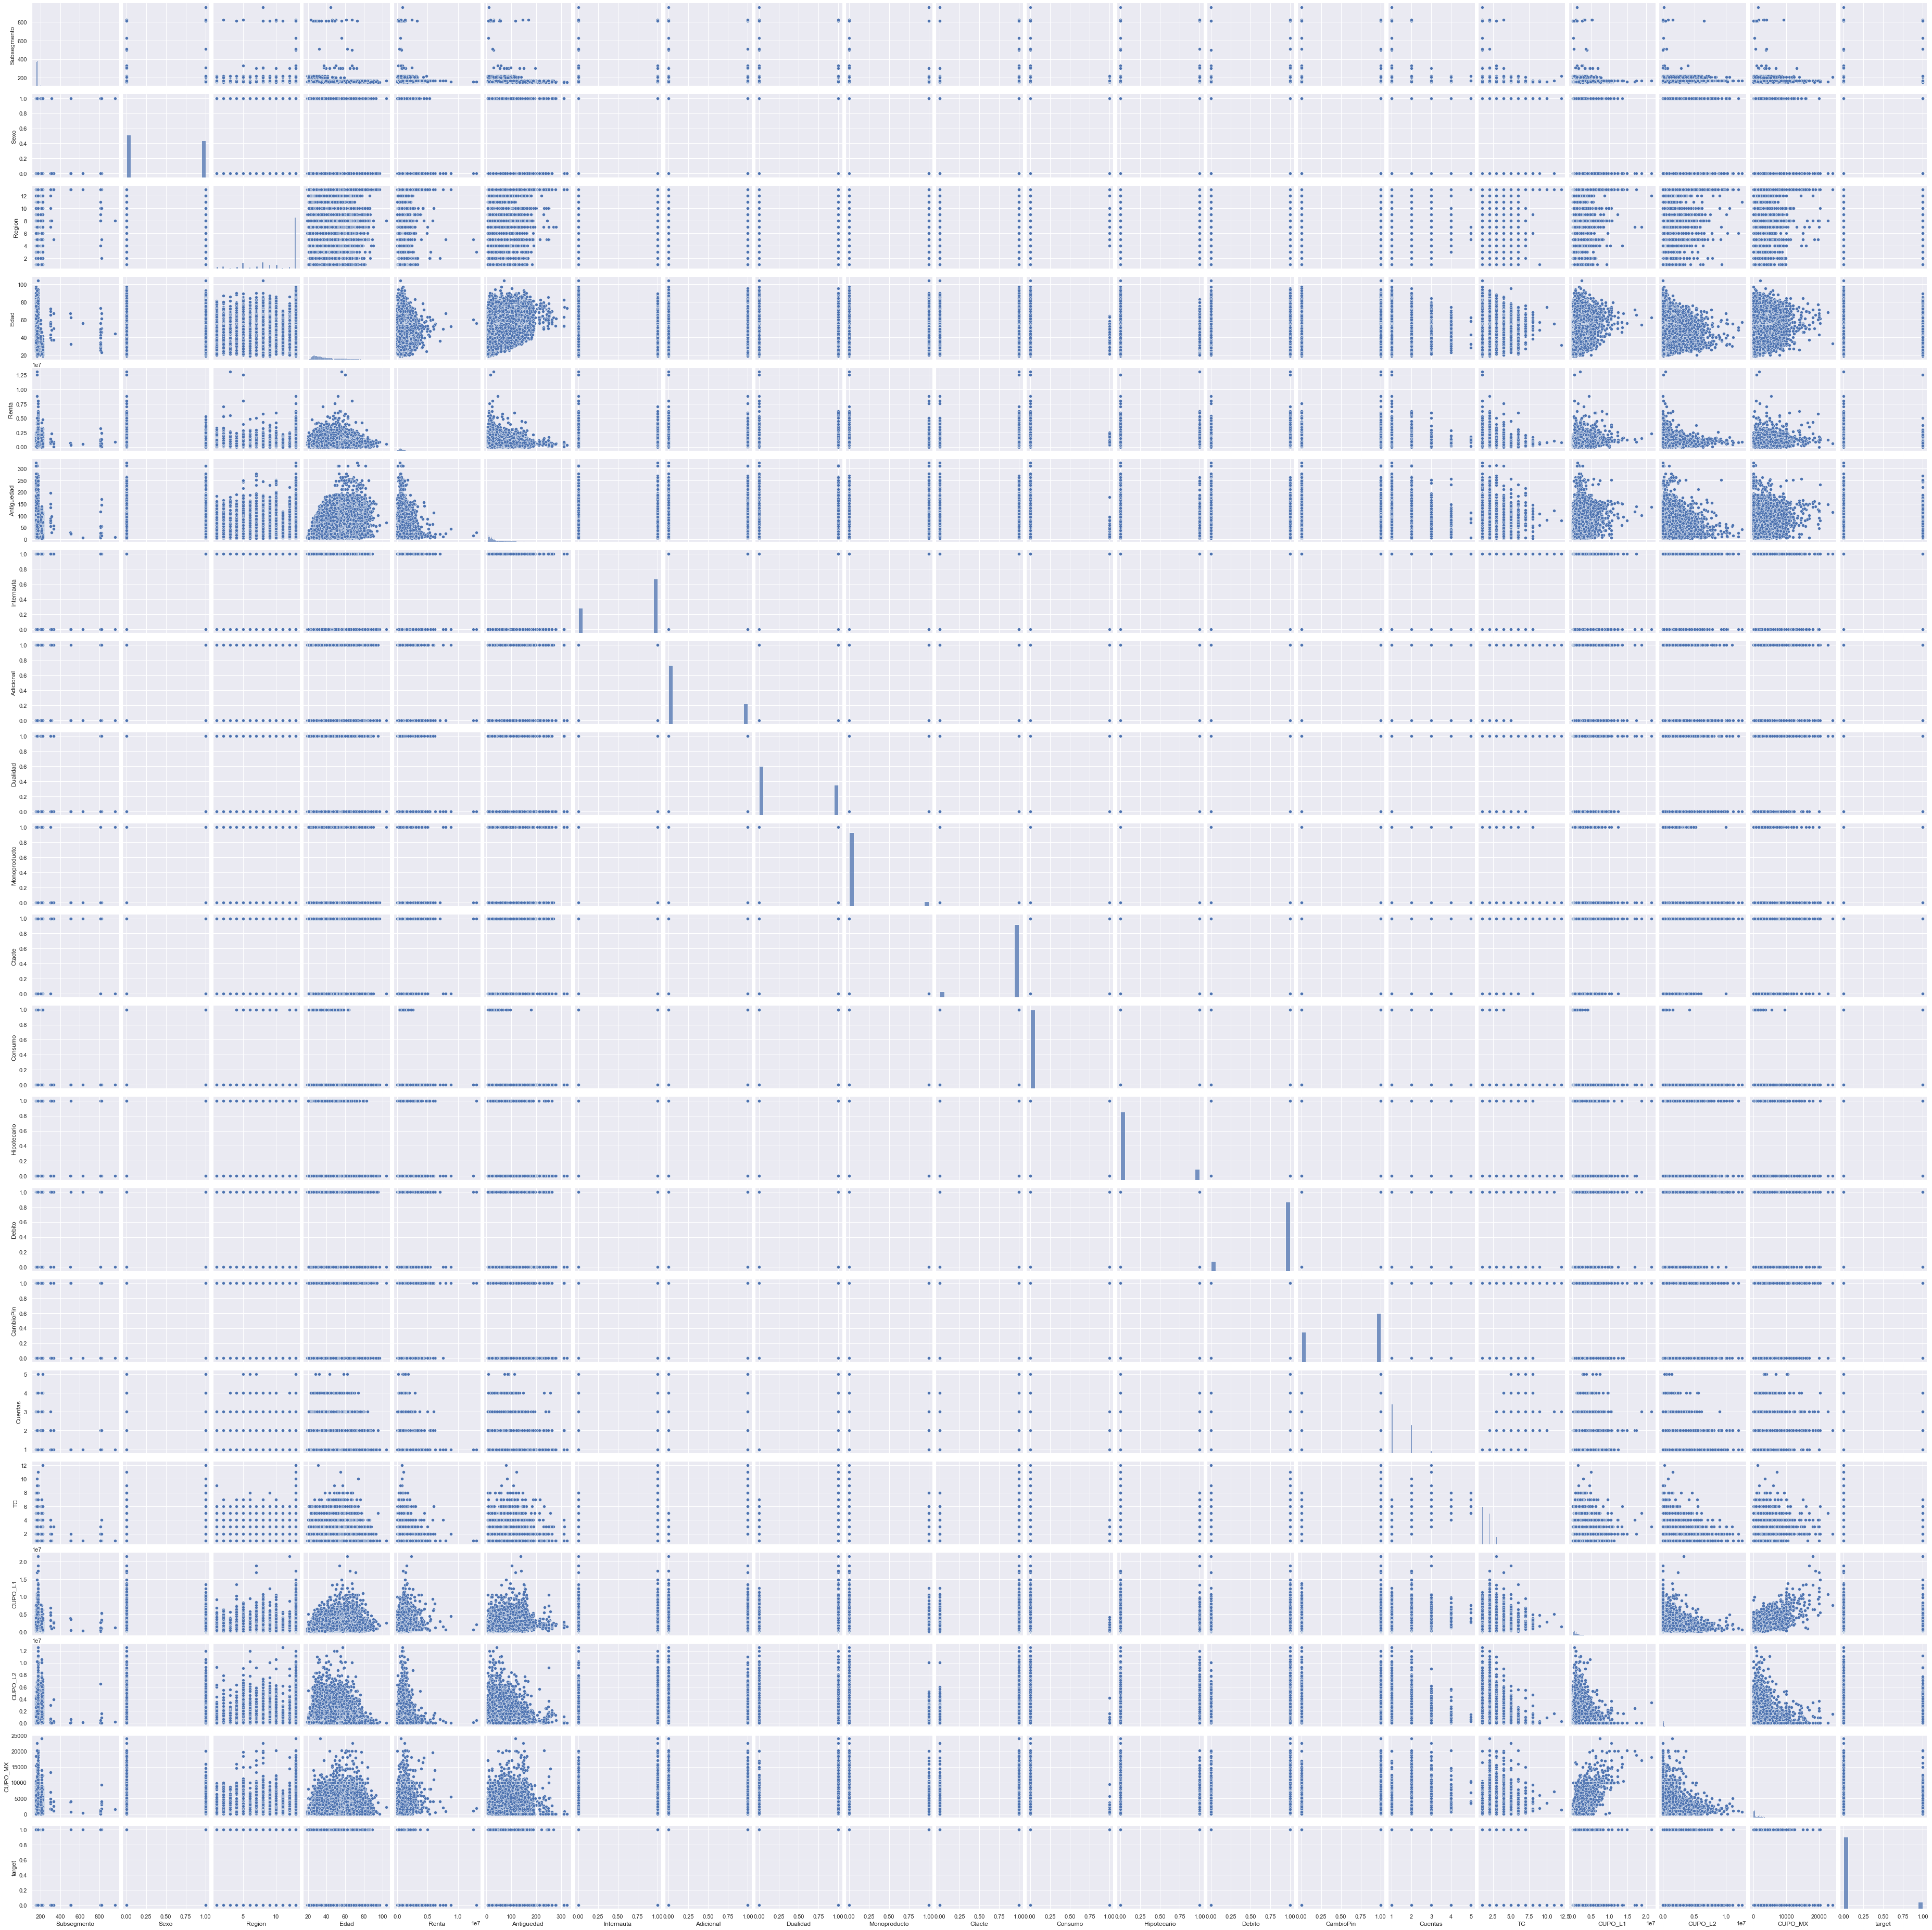

In [8]:
# Pair-plot
sns.set()
sns.pairplot(monopoly)
plt.show()

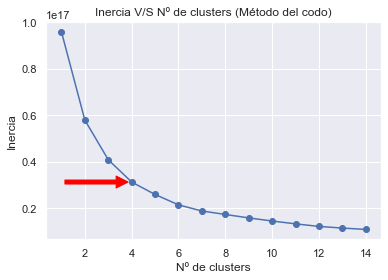

In [9]:
from kneed import KneeLocator

# Calcular la inercia para diferentes números de clusters
inercia = []
for i in range(1, 15):  # Rango de clusters
    modelo = KMeans(n_clusters=i, random_state=0)
    modelo.fit(monopoly)
    inercia.append(modelo.inertia_)

# Utilizar la biblioteca kneed para encontrar el "codo" de forma automática
kl = KneeLocator(range(1, 15), inercia, curve='convex', direction='decreasing')
codo_idx = kl.elbow

# Graficar la inercia
plt.plot(range(1, 15), inercia, marker='o')
plt.title('Inercia V/S Nº de clusters (Método del codo)')
plt.xlabel('Nº de clusters')
plt.ylabel('Inercia')

# Añadir ubicacion del codo
plt.annotate('', xy=(codo_idx, inercia[codo_idx-1]),
             xytext=(codo_idx - 3, inercia[codo_idx-1] + 500),
             arrowprops=dict(facecolor='red', edgecolor='red', shrink=0.05))

plt.show()

#### ➡️MODEL 1 | **K-Means**

1️⃣ - `Definición de variables:`

In [10]:
##'Edad' y 'Renta (k$)'##
X = monopoly.iloc[:, [3,4]].values

2️⃣ - `Modelo:`

In [11]:
KModel_1 = KMeans(n_clusters= 4, random_state=0)

3️⃣ - `Predicción:`

In [12]:
Y_hat = KModel_1.fit_predict(X)

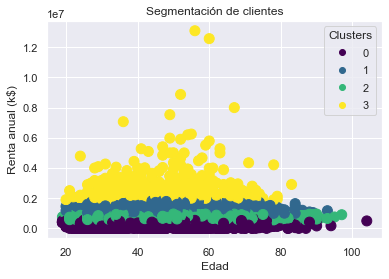

In [13]:
# Visualiza los clusters
scatter = plt.scatter(X[:, 0], X[:, 1], c=Y_hat, cmap='viridis', s=100)
plt.xlabel('Edad')
plt.ylabel('Renta anual (k$)')
plt.title('Segmentación de clientes')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

4️⃣ - `Evaluación:`

In [14]:
kmSS_1 = silhouette_score(X, Y_hat)

print("Silhouette Score:",kmSS_1)

Silhouette Score: 0.552132432130231


#### ➡️MODEL 2 | **K-Means**

1️⃣ - `Definición de variables:`

In [15]:
#'Edad' y 'Cupo_L1 (k$)'##
X = monopoly.iloc[:, [3,17]].values

2️⃣ - `Modelo:`

In [16]:
KModel_2 = KMeans(n_clusters= 4, random_state=0)

3️⃣ - `Predicción:`

In [17]:
Y_hat = KModel_2.fit_predict(X)

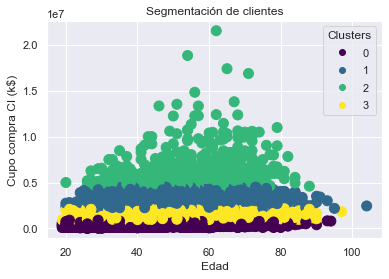

In [18]:
# Visualiza los clusters
scatter = plt.scatter(X[:, 0], X[:, 1], c=Y_hat, cmap='viridis', s=100)
plt.xlabel('Edad')
plt.ylabel('Cupo compra CI (k$)')
plt.title('Segmentación de clientes')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

4️⃣ - `Evaluación:`

In [19]:
kmSS_2 = silhouette_score(X, Y_hat)

print("Silhouette Score:",kmSS_2)

Silhouette Score: 0.5961338144247768


#### ➡️MODEL 3 | **K-Means**

1️⃣ - `Definición de variables:`

In [20]:
#'Antiguedad' y 'Cupo_L1 (k$)'##
X = monopoly.iloc[:, [5,17]].values

2️⃣ - `Modelo:`

In [21]:
KModel_3 = KMeans(n_clusters= 4, random_state=0)

3️⃣ - `Predicción:`

In [22]:
Y_hat = KModel_3.fit_predict(X)

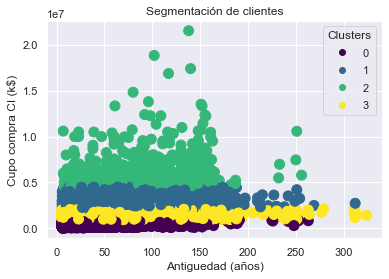

In [23]:
# Visualiza los clusters
scatter = plt.scatter(X[:, 0], X[:, 1], c=Y_hat, cmap='viridis', s=100)
plt.xlabel('Antiguedad (años)')
plt.ylabel('Cupo compra CI (k$)')
plt.title('Segmentación de clientes')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

4️⃣ - `Evaluación:`

In [24]:
kmSS_3 = silhouette_score(X, Y_hat)

print("Silhouette Score:",kmSS_3)

Silhouette Score: 0.5961334607703359


#### ➡️MODEL 4 | **K-Means**

1️⃣ - `Definición de variables:`

In [25]:
#'Edad' y 'Cupo_MX (k$)'
X = monopoly.iloc[:, [3,19]].values

2️⃣ - `Modelo:`

In [26]:
KModel_4 = KMeans(n_clusters= 4, random_state=0)

3️⃣ - `Predicción:`

In [27]:
Y_hat = KModel_4.fit_predict(X)

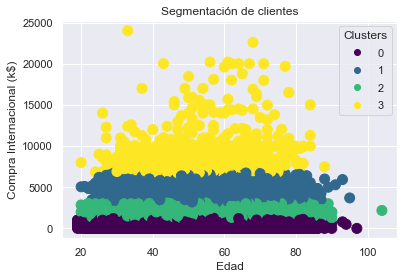

In [28]:
# Visualiza los clusters
scatter = plt.scatter(X[:, 0], X[:, 1], c=Y_hat, cmap='viridis', s=100)
plt.xlabel('Edad')
plt.ylabel('Compra Internacional (k$)')
plt.title('Segmentación de clientes')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

4️⃣ - `Evaluación:`

In [29]:
kmSS_4 = silhouette_score(X, Y_hat)

print("Silhouette Score:",kmSS_4)

Silhouette Score: 0.6306542125030735


#### ➡️MODEL 5 | **K-Means**

1️⃣ - `Def hiperparametros:`

In [30]:
# Define el espacio de búsqueda de hiperparámetros, incluyendo otros hiperparámetros además de n_clusters e init
param_grid = {
    'n_clusters': [3, 4, 5, 6, 7,9,10,11,12],
    'init': ['k-means++', 'random'],
    'max_iter': [100, 200, 300],
    'tol': [1e-4, 1e-3, 1e-2]
}

# Crea un modelo K-Means
modelo = KMeans()

# Realiza una búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(modelo, param_grid, cv=5, scoring=silhouette_score, n_jobs=1)
grid_search.fit(X)

# Obtiene los mejores hiperparámetros
best_params = grid_search.best_params_

best_n_clusters = grid_search.best_params_['n_clusters']
best_init = grid_search.best_params_['init']
best_max_iter = grid_search.best_params_['max_iter']
best_tol = grid_search.best_params_['tol']

# Imprime los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(f"Número de clústeres (n_clusters): {best_n_clusters}")
print(f"Método de inicialización (init): {best_init}")
print(f'Maximum number of iterations for each run (max_iter): {best_max_iter}')
print(f'Tolerance (tol): {best_tol}')

Mejores hiperparámetros encontrados:
Número de clústeres (n_clusters): 3
Método de inicialización (init): k-means++
Maximum number of iterations for each run (max_iter): 100
Tolerance (tol): 0.0001


2️⃣ - `Modelo:`

In [31]:
# Crea un modelo con los mejores hiperparámetros
KModel_5 = KMeans(**best_params, random_state=0)

3️⃣ - `Predicción:`

In [32]:
Y_hat = KModel_5.fit_predict(X)

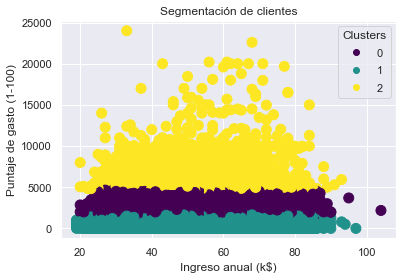

In [33]:
# Visualiza los clusters
scatter = plt.scatter(X[:, 0], X[:, 1], c=Y_hat, cmap='viridis', s=100)
plt.xlabel('Ingreso anual (k$)')
plt.ylabel('Puntaje de gasto (1-100)')
plt.title('Segmentación de clientes')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

4️⃣ - `Evaluación:`

In [34]:
kmSS_5 = silhouette_score(X, Y_hat)

print("Silhouette Score:", kmSS_5)

Silhouette Score: 0.6486684902102687


#### ➡️MODEL 6 | **K-Means**

1️⃣ - `Definición de variables:`

In [35]:
# Normalización de los datos
scaler = StandardScaler()
df_sc = scaler.fit_transform(monopoly)

2️⃣ - `Definicion de componentes parciales:`

In [37]:
from sklearn.decomposition import PCA

# Aplica PCA para reducir la dimensionalidad
pca = PCA(n_components=2)
X_PCA = pca.fit_transform(df_sc)

In [38]:
# Obtener las contribuciones de características a las componentes principales
componentes = pca.components_

# Crear un DataFrame para visualizar las contribuciones
contribuciones = pd.DataFrame(componentes, columns=monopoly.columns, index=['Componente 1', 'Componente 2'])
contribuciones

,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,...,Consumo,Hipotecario,Debito,CambioPin,Cuentas,TC,CUPO_L1,CUPO_L2,CUPO_MX,target
Componente 1,-0.265433,-0.046644,0.042448,0.342483,0.200640,0.324554,-0.165390,0.219749,0.194090,0.195017,...,0.003437,0.065555,-0.236457,-0.059542,0.20922,0.291366,0.387955,0.119313,0.342187,0.013665
Componente 2,-0.043410,0.033015,-0.000185,0.139278,-0.045278,0.118586,-0.205431,-0.055312,-0.396645,0.399665,...,-0.003792,-0.100376,-0.352173,-0.091356,-0.40155,-0.312529,-0.112122,-0.056619,-0.128878,0.088329


3️⃣ - `Modelo:`

In [39]:
KModel_6 = KMeans(n_clusters=4, random_state=0)

4️⃣ - `Predicción:`

In [40]:
Y_hat = KModel_6.fit_predict(X_PCA)

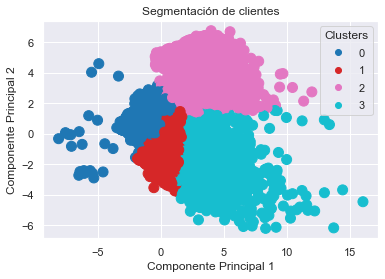

In [41]:
# Visualiza los clusters
scatter = plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=Y_hat, cmap='tab10', s=100)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Segmentación de clientes')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

5️⃣ - `Evaluación:`

In [42]:
kmSS_6 = silhouette_score(X_PCA, Y_hat)

print("Silhouette Score:", kmSS_6)

Silhouette Score: 0.4547948386001818


#### ✅Winner MODEL | **K-Means**

In [49]:
# Almacenando los resultados en una lista
scores = [kmSS_1, kmSS_2, kmSS_3, kmSS_4, kmSS_5, kmSS_6]

# Creando el DataFrame con los resultados
tabla = pd.DataFrame({'Modelo': ['Modelo 1', 'Modelo 2', 'Modelo 3', 'Modelo 4', 'Modelo 5', 'Modelo 6'],
                      'Silhouette Score': scores})

print(tabla)

     Modelo  Silhouette Score
0  Modelo 1          0.552132
1  Modelo 2          0.596134
2  Modelo 3          0.596133
3  Modelo 4          0.630654
4  Modelo 5          0.648668
5  Modelo 6          0.454795


In [50]:
import joblib

joblib.dump({KModel_5}, '{Kmeans_M5.pkl}')

['{Kmeans_M5.pkl}']